<a href="https://colab.research.google.com/github/johnadornado/CPE-311/blob/main/Hands_on_Activity_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib

Instructions:

    Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

Resources:

    Download the following datasets: earthquakes-1.csv

Download earthquakes-1.csv, fb_stock_prices_2018.csv

    Download fb_stock_prices_2018.csv




Procedures:

    9.1 Introduction to Matplotlib
    9.2 Plotting with Pandas
    9.3 Pandas Plotting Subpackage

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Plotting lines

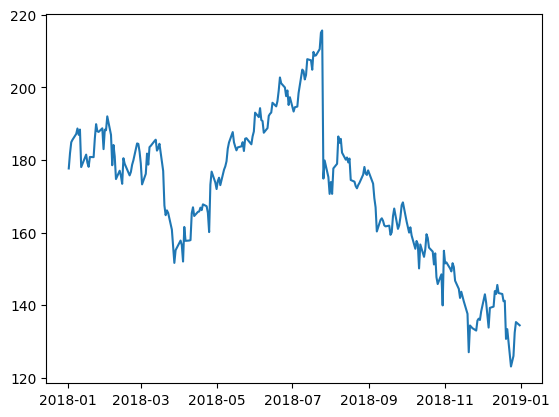

In [ ]:
fb = pd.read_csv(
'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)
plt.show()

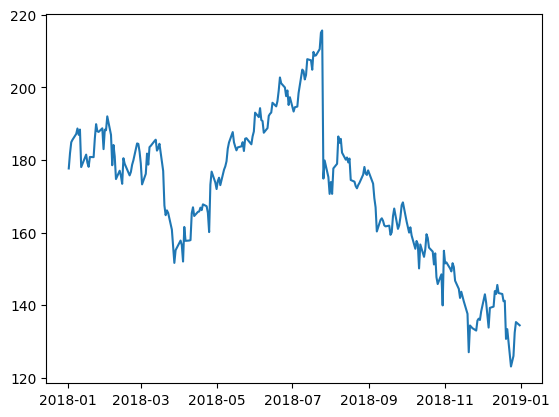

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
fb = pd.read_csv(
'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

#Scatter plots

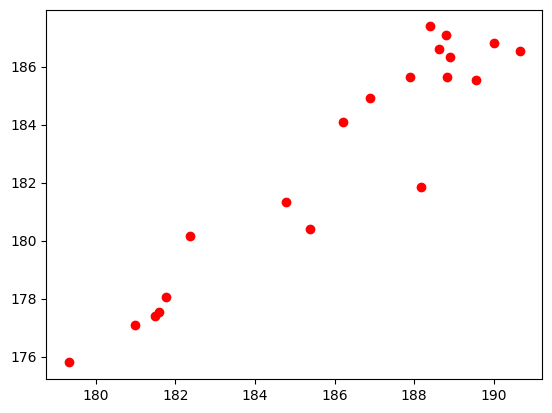

In [ ]:
plt.plot('high', 'low', 'ro', data = fb.head(20))

#Histograms

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

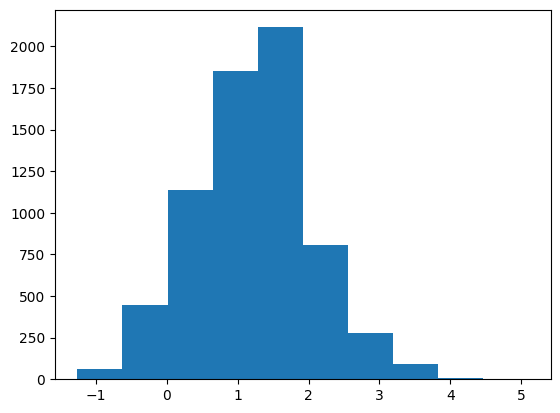

In [ ]:
quakes = pd.read_csv('earthquakes-1.csv')
plt.hist(quakes.query('magType == "ml"').mag)

#Bin size matters

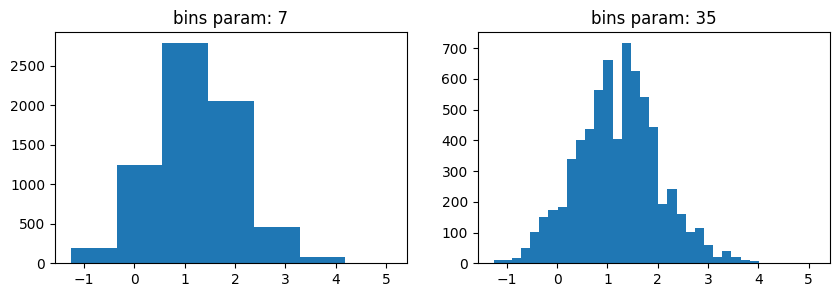

In [ ]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

#Plot components

##Figure

In [ ]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

##Axes
individual plots contained within the Figure

#Creating subplots

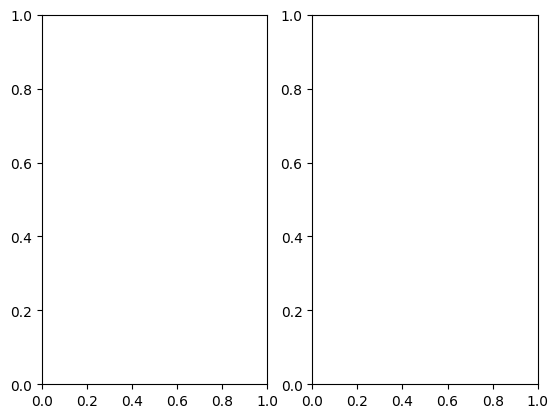

In [ ]:
fig, axes = plt.subplots(1, 2)

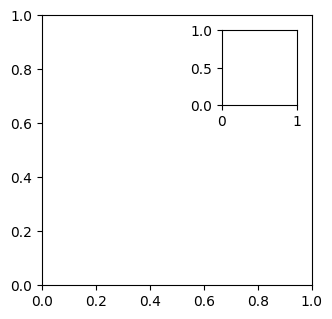

In [ ]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

#Creating Plot Layouts with
##gridspec

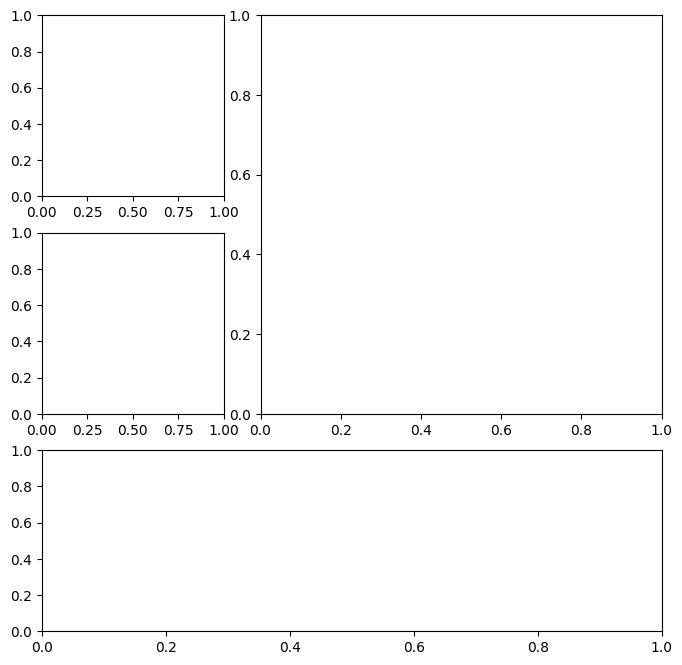

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

#Saving plots
##Use plt.savefig() to save the last created plot. To save a specific Figure object, use its savefig() method.

In [ ]:
fig.savefig('empty.png')

# Cleaning up

In [ ]:
plt.close('all')

#Additional plotting options
Specifying figure size
Just pass the figsize parameter to plt.figure() . It's a tuple of (width, height):

In [ ]:
fig = plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

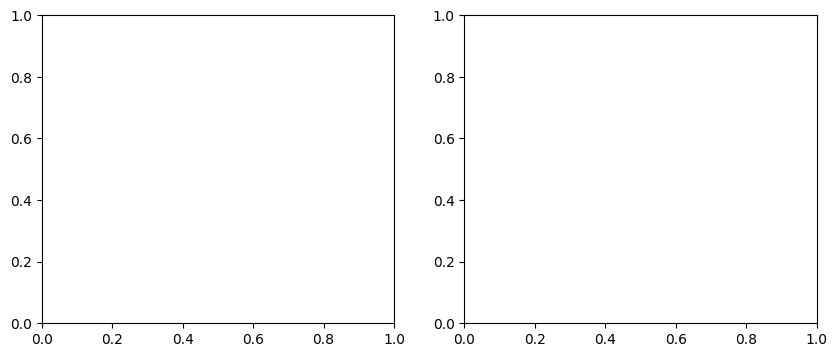

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# rcParams

In [ ]:
import random
import matplotlib as mpl
rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['animation.convert_args',
 'axes.edgecolor',
 'axes.formatter.use_locale',
 'axes.spines.right',
 'boxplot.meanprops.markersize',
 'boxplot.showfliers',
 'keymap.home',
 'lines.markerfacecolor',
 'lines.scale_dashes',
 'mathtext.rm',
 'patch.force_edgecolor',
 'savefig.facecolor',
 'svg.fonttype',
 'text.hinting_factor',
 'xtick.alignment',
 'xtick.minor.top',
 'xtick.minor.width',
 'ytick.left',
 'ytick.major.left',
 'ytick.minor.width']

#To check the current default figsize using rcParams

In [ ]:
mpl.rcParams['figure.figsize']

[6.4, 4.8]

#Use for updating the value of the default(until the kernal is restarted)

In [ ]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

Use rcdefaults() to restore the defaults

In [ ]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

also can be done via pyplot

In [ ]:
plt.rc('figure', figsize=(20, 20))
plt.rcdefaults()

# Plotting with Pandas
## The plot() method is available on Series and DataFrame objects. Many of the parameters get passed down to matplotlib. The kind argument let's us vary the plot type.
## About the Data
## In this notebook, we will be working with 2 datasets:
Facebook's stock price throughout 2018

* Facebook's stock price throughout 2018(obtained using the stock_analysis package)
* Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)

#Setup

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes-1.csv')

#Evolution Over time

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

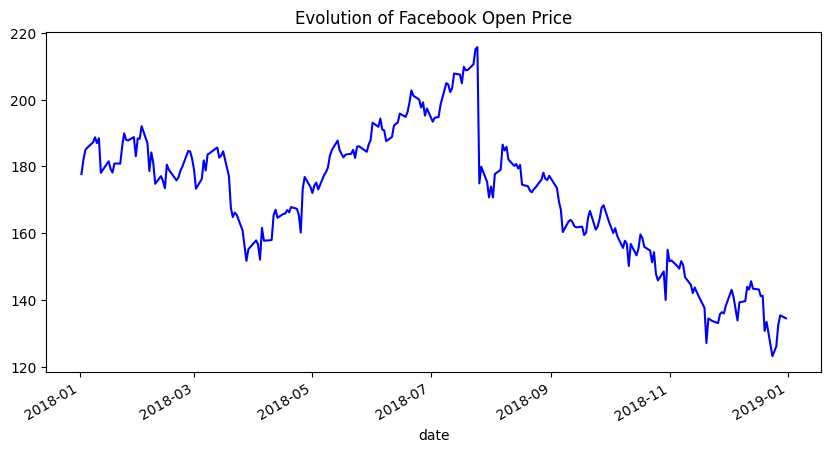

In [ ]:
fb.plot(
    kind ='line',
    y = 'open',
    figsize = (10, 5),
    style = 'b-',
    legend = False,
    title = 'Evolution of Facebook Open Price'
)

#We provided the style argument in the previous example; however, we can use the color and linestyle arguments to get the same result:

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

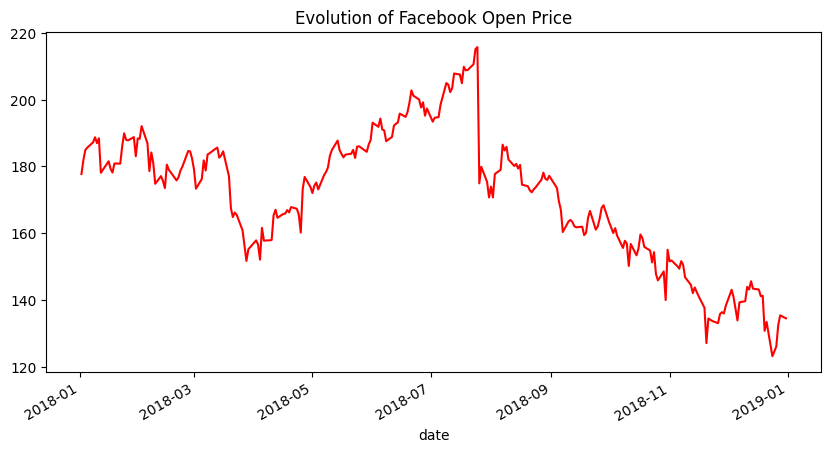

In [ ]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='red',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

#We can also plot many lines at once by simply passing a list of the columns to plot:

<Axes: title={'center': 'Facebook OHLC Prices during 1st Week of Trading 2018'}, xlabel='date'>

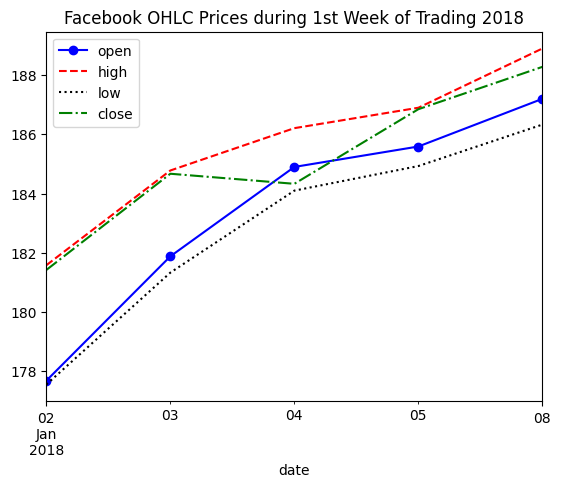

In [ ]:
fb.iloc[:5,].plot(
    y=['open', 'high', 'low', 'close'],
    style=['b-o', 'r--', 'k:', 'g-.'],
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
)

#Creating subplots

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

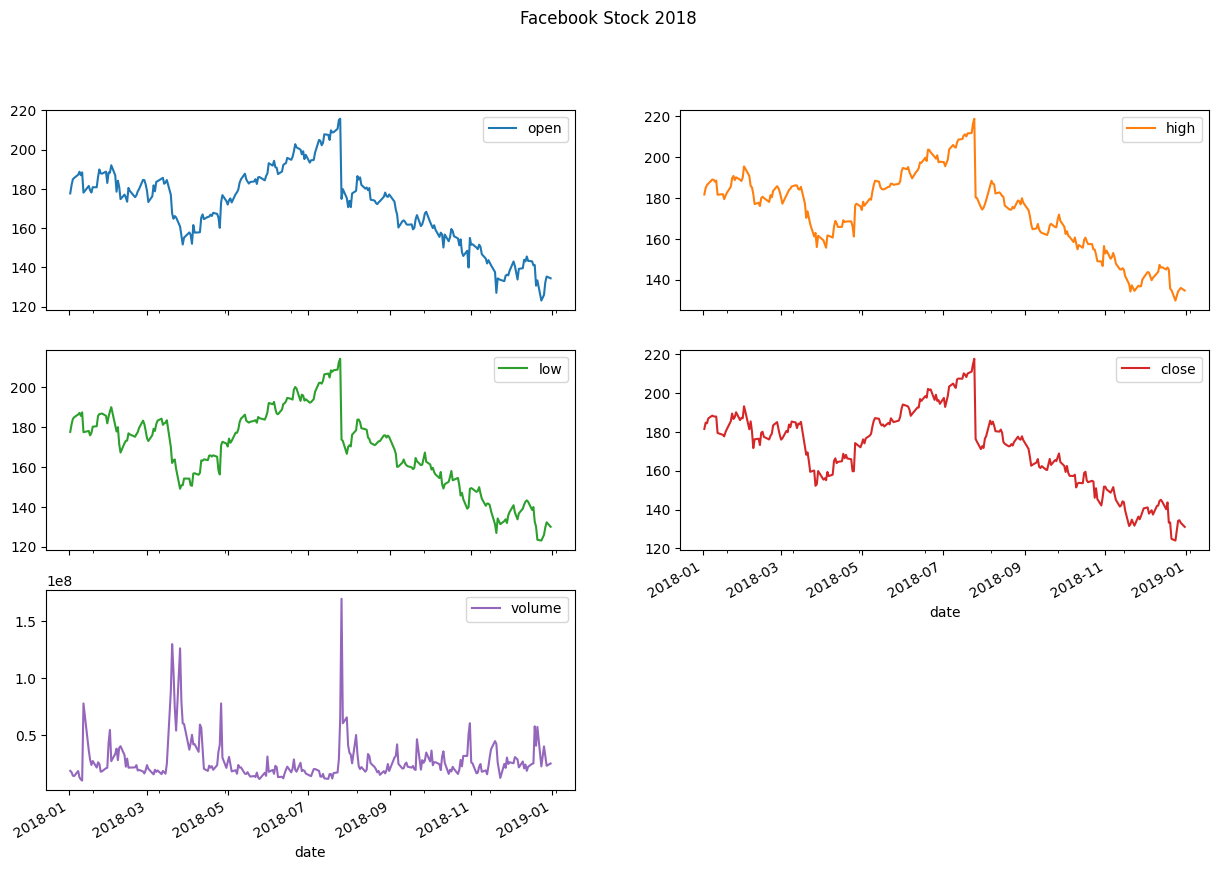

In [ ]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3,2),
    figsize=(15,10),
    title='Facebook Stock 2018'
)

#Visualizing relationships between variables

#Scatter plots
##We make scatter plots to help visualize the relationship between two variables. Creating scatter plots requires we pass in kind='scatter' along with a column for the x-axis and a column for the y-axis:

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

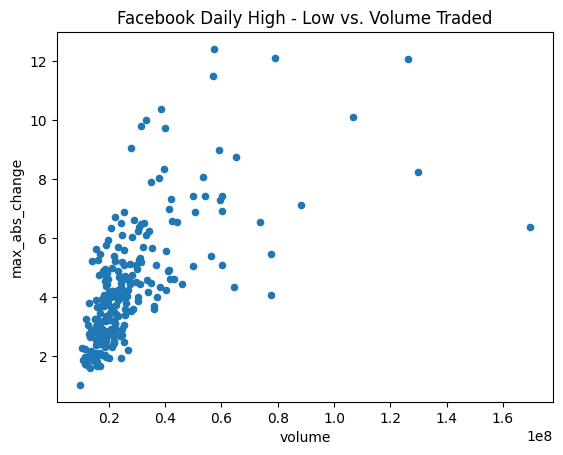

In [ ]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

# The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With pandas, we simply pass in logx=True

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

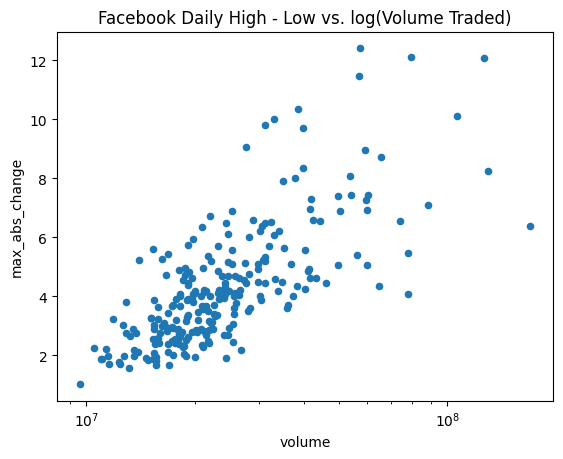

In [ ]:
fb.assign(
max_abs_change=fb.high - fb.low
).plot(
kind='scatter', x='volume', y='max_abs_change',
title='Facebook Daily High - Low vs. log(Volume Traded)',
logx=True
)

#Adding Transparency to Plots with alpha
Sometimes our plots have many overlapping values, but this can be impossible to see. This can be addressed by increasing the transparency of what we are plotting using the
alpha parameter. It is a float on [0, 1] where 0 is completely transparent and 1 is completely opaque. By default this is 1, so let's put in a lower value and re-plot the scatter
plot:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

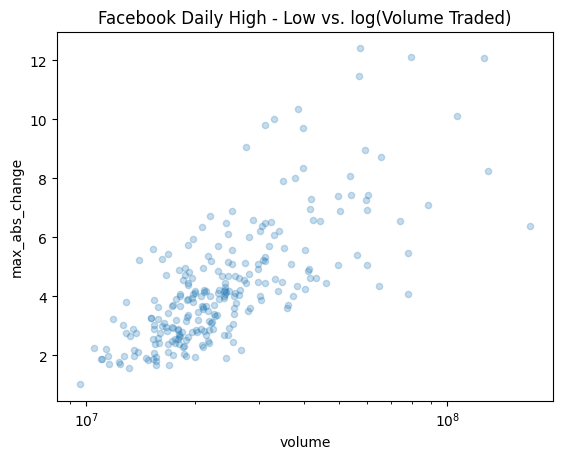

In [ ]:
fb.assign(
max_abs_change=fb.high - fb.low
).plot(
kind='scatter', x='volume', y='max_abs_change',
title='Facebook Daily High - Low vs. log(Volume Traded)',
logx=True, alpha=0.25
)

#Hexbins
In the previous example, we can start to see the overlaps, but it is still difficult. Hexbins are another plot type that divide up the plot into hexagons, which are shaded
according to the density of points there. With pandas, this is the hexbin value for the kind argument. It can also be important to tweak the gridsize , which determines
the number of hexagons along the y-axis:

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

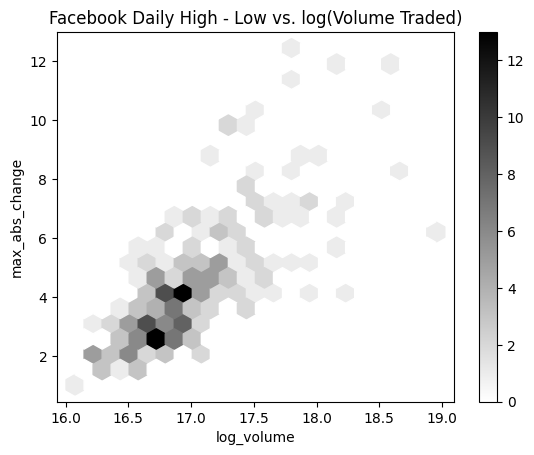

In [ ]:
fb.assign(
log_volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
).plot(
kind='hexbin',
x='log_volume',
y='max_abs_change',
title='Facebook Daily High - Low vs. log(Volume Traded)',
colormap='gray_r',
gridsize=20,
sharex=False # we have to pass this to see the x-axis due to a bug in this version of pandas
)

#Visualizing Correlations with Heatmaps
Pandas doesn't offer heatmaps; however, if we are able to get our data into a matrix, we can use matshow() from matplotlib:

<ipython-input-54-b4fcd3ecb8b3>:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(im.set_clim(-1, 1))
<ipython-input-54-b4fcd3ecb8b3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, rotation=45)
<ipython-input-54-b4fcd3ecb8b3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


[Text(0, -1.0, ''),
 Text(0, 0.0, 'open'),
 Text(0, 1.0, 'high'),
 Text(0, 2.0, 'low'),
 Text(0, 3.0, 'close'),
 Text(0, 4.0, 'volume'),
 Text(0, 5.0, 'log_volume'),
 Text(0, 6.0, 'max_abs_change'),
 Text(0, 7.0, '')]

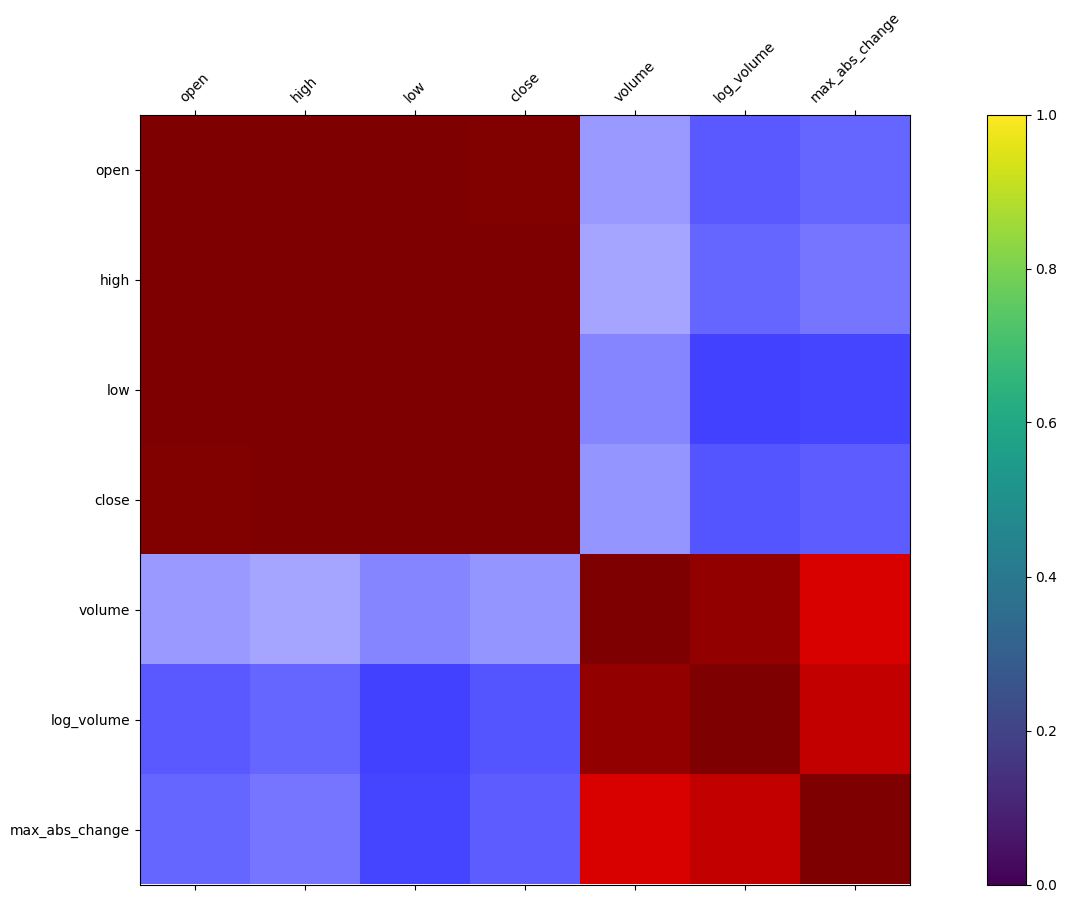

In [ ]:

fig, ax = plt.subplots(figsize=(20, 10))

fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

im = ax.matshow(fb_corr, cmap='seismic')
fig.colorbar(im.set_clim(-1, 1))

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)

In [ ]:
fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64

#Visualizing distributions
Histograms
With the pandas plot() method, making histograms is as easy as passing in kind='hist' :

Text(0.5, 0, 'Volume traded')

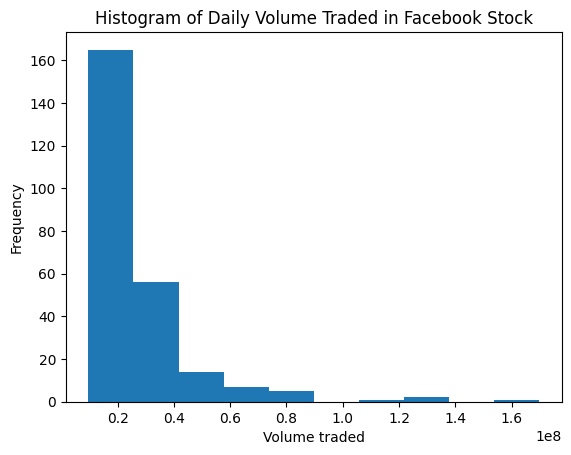

In [ ]:
fb.volume.plot(
kind='hist',
title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'magnitude')

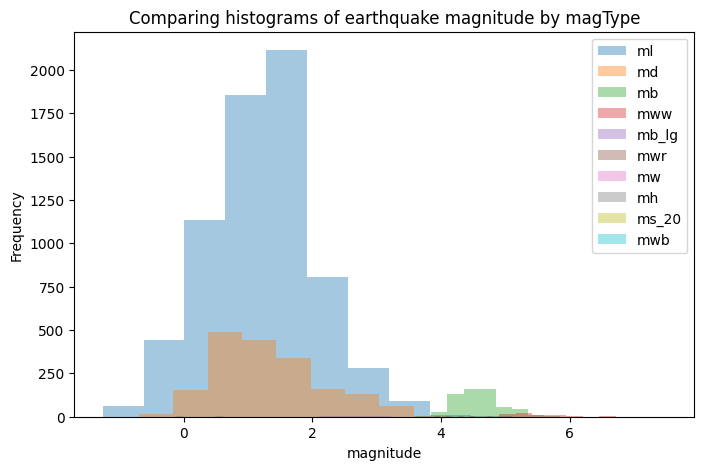

In [ ]:
fig, axes = plt.subplots(figsize=(8, 5))
for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4,
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
)
plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)

#Kernel Density Estimation (KDE)
We can pass kind='kde' for a probability density function (PDF), which tells us the probability of getting a particular value:

Text(0.5, 0, 'Price ($)')

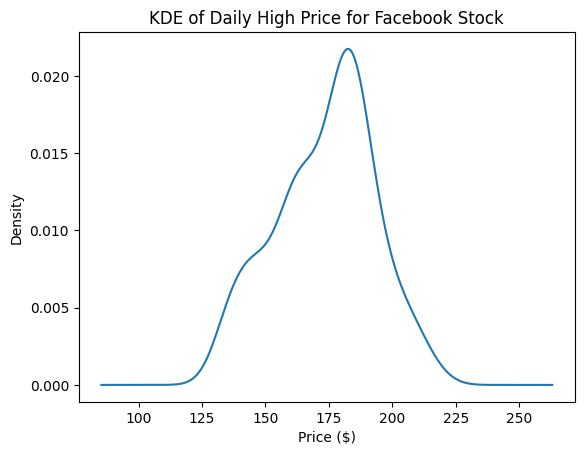

In [ ]:
fb.high.plot(
kind='kde',
title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

#Adding to the result of plot()
The plot() method returns a matplotlib Axes object. We can store this for additional customization of the plot, or we can pass this into another call to plot() as the
ax argument to add to the original plot.
It can often be helpful to view the KDE superimposed on top of the histogram, which can be achieved with this strategy:

Text(0.5, 0, 'Price ($)')

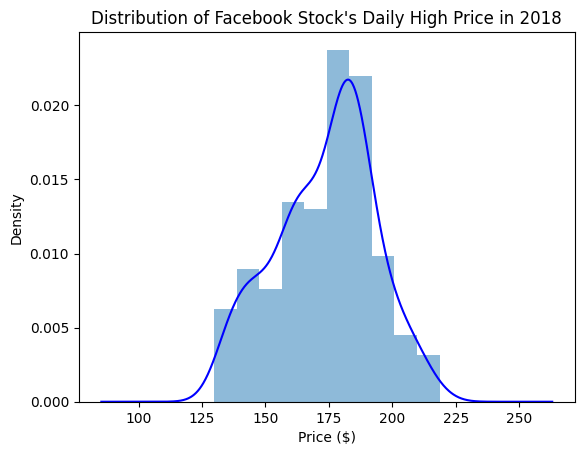

In [ ]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue',
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
    )
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

#Plotting the ECDF
In some cases, we are more interested in the probability of getting less than or equal to that value (or greater than or equal), which we can see with the cumulative disribution
function (CDF). Using the statsmodels package, we can estimate the CDF giving us the empirical cumulative distribution function (ECDF):

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

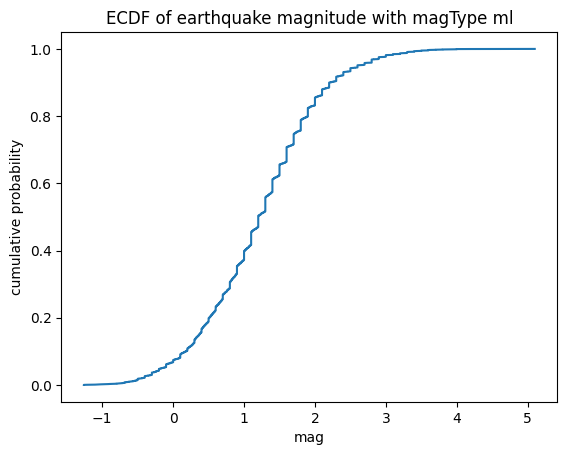

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label
# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

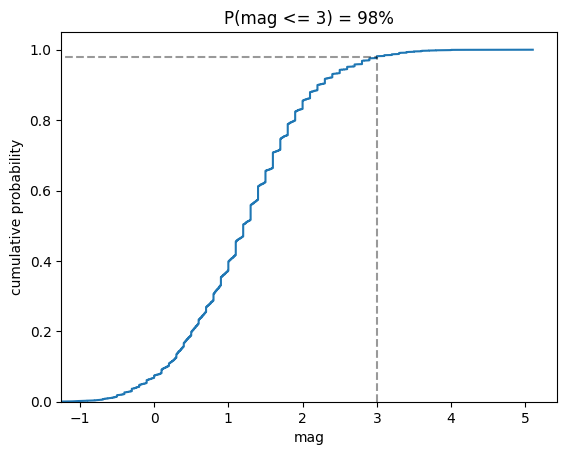

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label
# add reference lines for interpreting the ECDF for mag <= 3
plt.plot(
[3, 3], [0, .98], 'k--',
[-1.5, 3], [0.98, 0.98], 'k--', alpha=0.4
)
# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)
# add a title
plt.title('P(mag <= 3) = 98%')

#Box plots
To make box plots with pandas, we pass kind='box' to the plot() method:

Text(0, 0.5, 'price ($)')

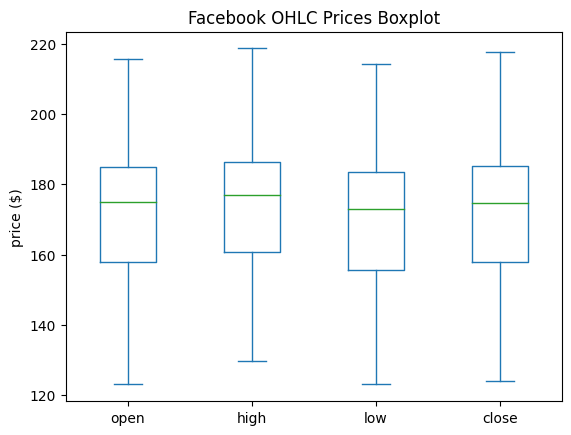

In [ ]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Boxplot')
plt.ylabel('price ($)') # label the x-axis (discussed in chapter 6)

Text(0.5, 1.1, 'Facebook OHLC Boxplots by Volume Traded')

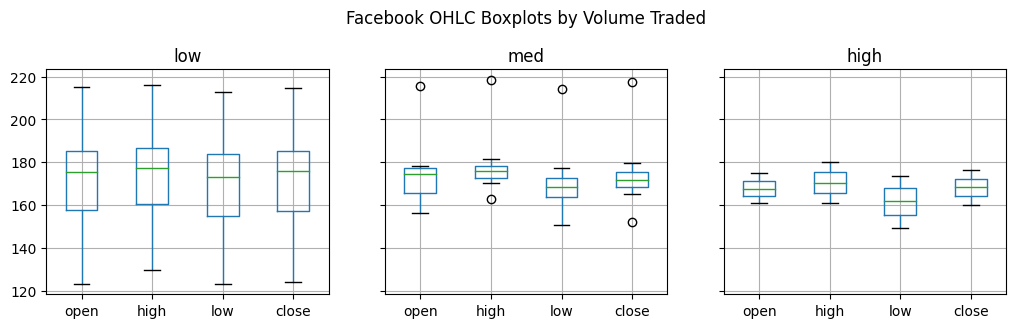

In [ ]:
fb.assign(
volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
column=['open', 'high', 'low', 'close'],
layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)

Text(0, 0.5, 'magnitude')

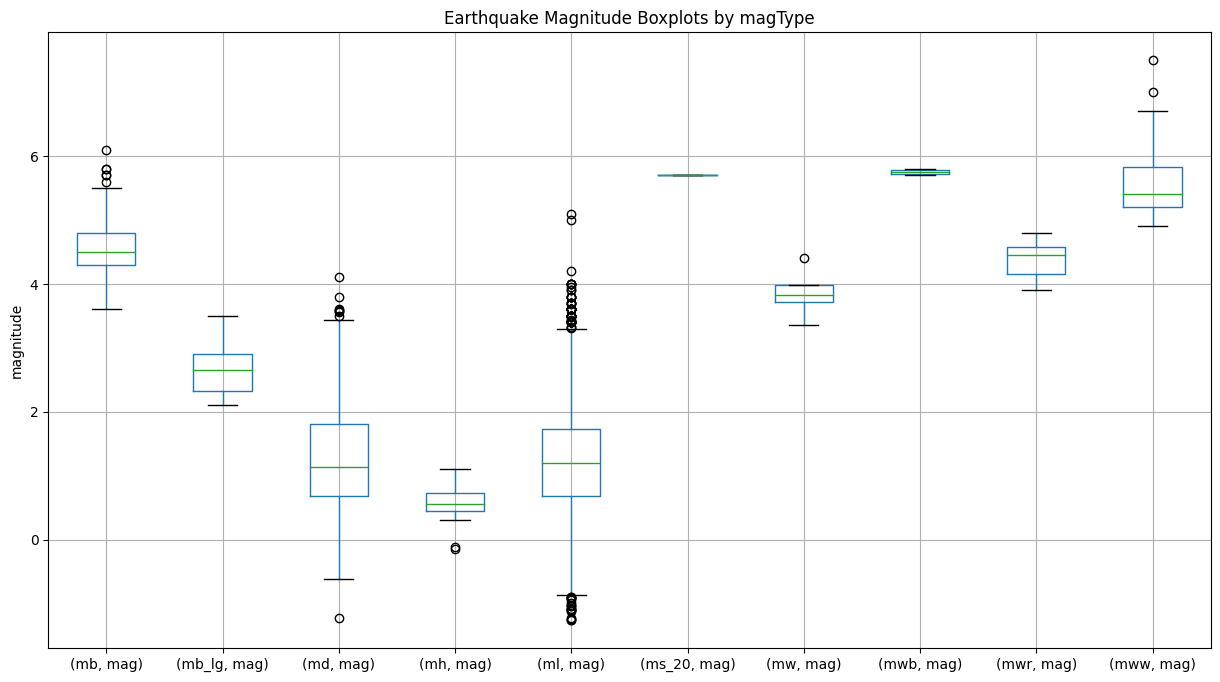

In [ ]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)

#Counts and frequencies
Bar charts
With pandas, we have the option of using the kind argument or using plot.<kind>() . Let's use plot.bar() here to show the evolution of monthly volume traded in
Facebook stock over time:

Text(0, 0.5, 'volume')

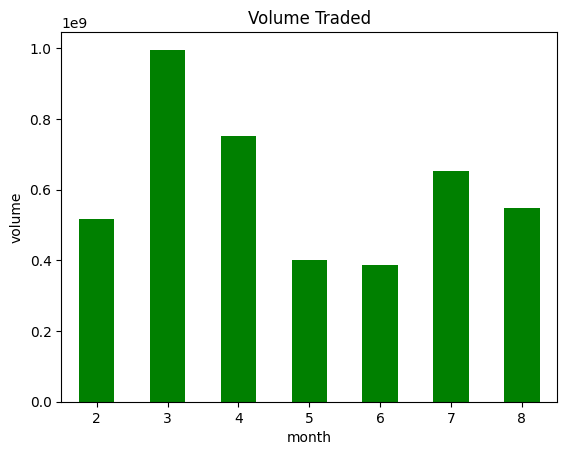

In [ ]:
fb['2018-02':'2018-08'].assign(
month=lambda x: x.index.month
).groupby('month').sum().volume.plot.bar(
color='green', rot=0, title='Volume Traded'
)
plt.ylabel('volume') # label the y-axis (discussed in chapter 6)

We can also change the orientation of the bars. Passing kind='barh' gives us horizontal bars instead of vertical ones. Let's use this to look at the top 15 places for
earthquakes in our data

Text(0.5, 0, 'earthquakes-1')

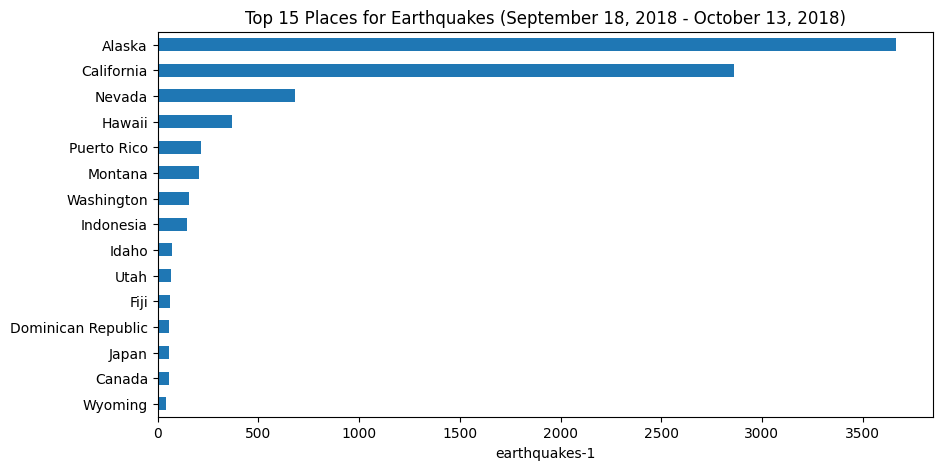

In [ ]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
kind='barh', figsize=(10, 5),
title='Top 15 Places for Earthquakes '\
'(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes-1') # label the x-axis (discussed in chapter 6)

We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are:

Text(0.5, 0, 'tsunamis')

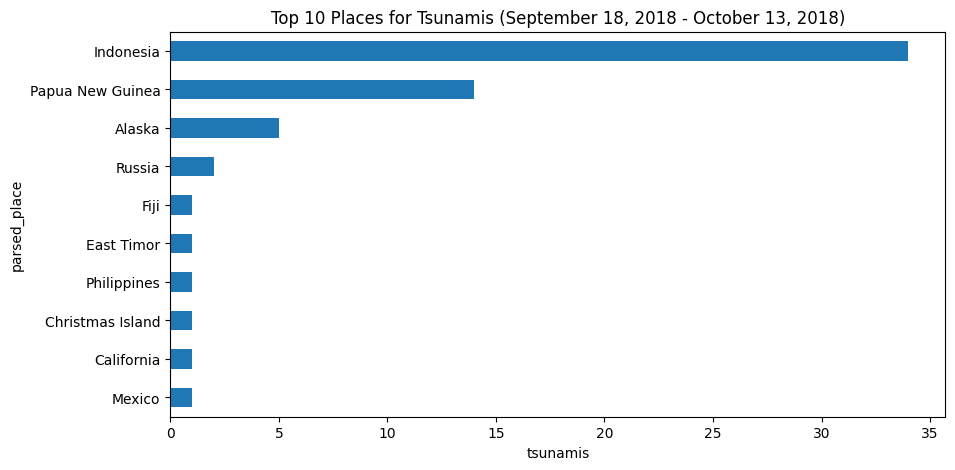

In [ ]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::,].plot(
kind='barh', figsize=(10, 5),
title='Top 10 Places for Tsunamis '\
'(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis') # label the x-axis (discussed in chapter 6)

Seeing that Indonesia is the top place for tsunamis during the time period we are looking at, we may want to look how many earthquakes and tsunamis Indonesia gets on a
daily basis. We could show this as a line plot or with bars; since this section is about bars, we will use bars here:

<ipython-input-69-57c971f04235>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).set_index('time').resample('1D').sum()


Text(0, 0.5, 'count')

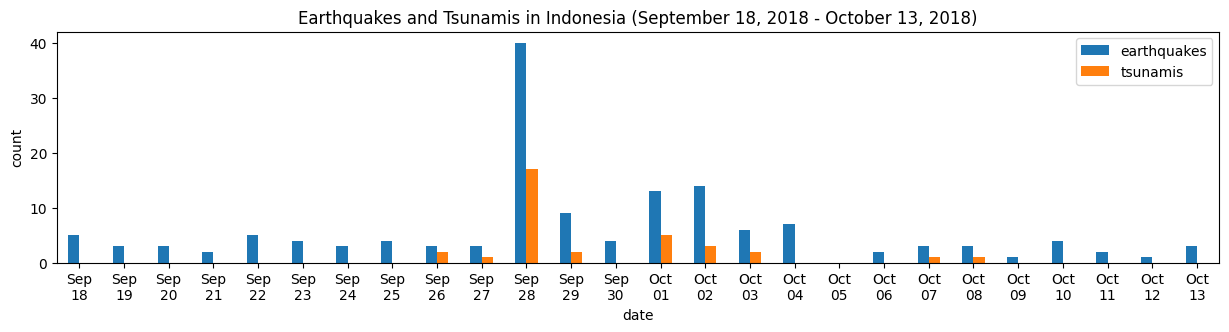

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
time=lambda x: pd.to_datetime(x.time, unit='ms'),
earthquake=1
).set_index('time').resample('1D').sum()
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')
indonesia_quakes.plot(
y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), rot=0,
label=['earthquakes', 'tsunamis'],
title='Earthquakes and Tsunamis in Indonesia '\
'(September 18, 2018 - October 13, 2018)'
)
# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Using the kind arugment for vertical bars when the labels for each bar are shorter

Text(0, 0.5, 'earthquakes')

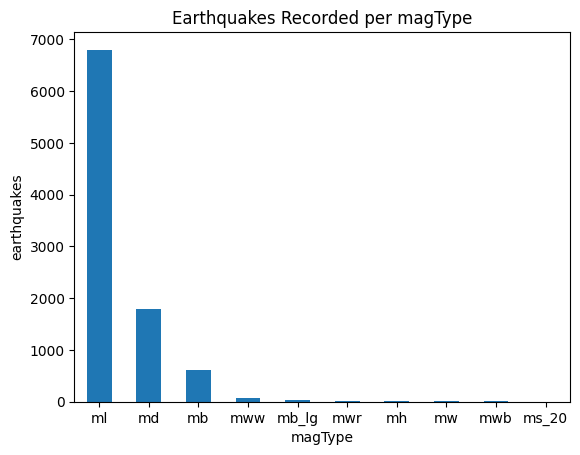

In [ ]:
quakes.magType.value_counts().plot(
kind='bar', title='Earthquakes Recorded per magType', rot=0
)
# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')

Top 4 places with earthquakes:

Text(0, 0.5, 'earthquakes')

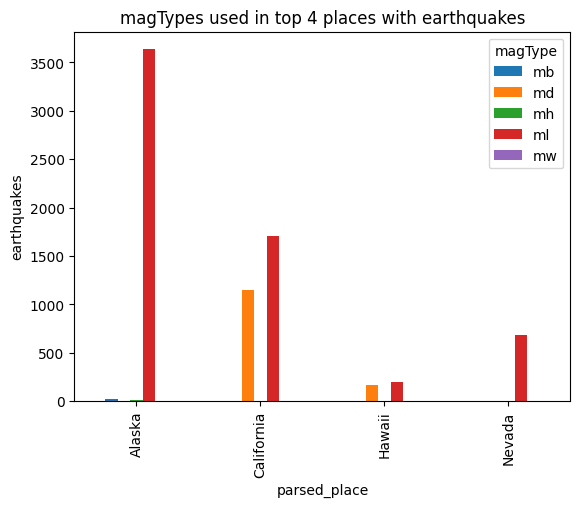

In [ ]:
quakes[
quakes.parsed_place.isin(['California', 'Alaska', 'Nevada', 'Hawaii'])
].groupby(['parsed_place', 'magType']).mag.count().unstack().plot.bar(
title='magTypes used in top 4 places with earthquakes'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)

#Stacked bar chart

Text(0, 0.5, 'earthquakes')

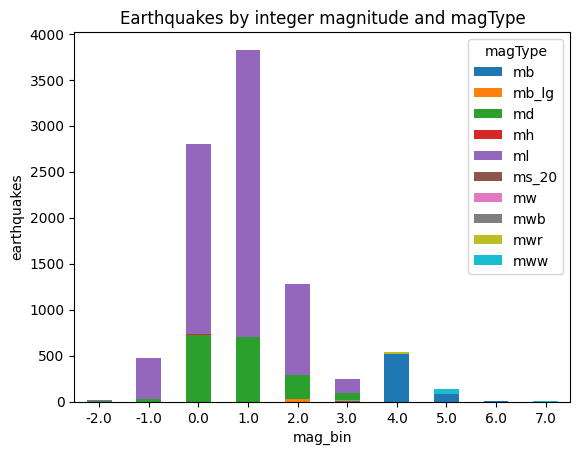

In [ ]:
pivot = quakes.assign(
mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
stacked=True, rot=0,
title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)

#Normalized stacked bars
Plot the percentages to be better able to see the different magTypes

Text(0, 0.5, 'percentage')

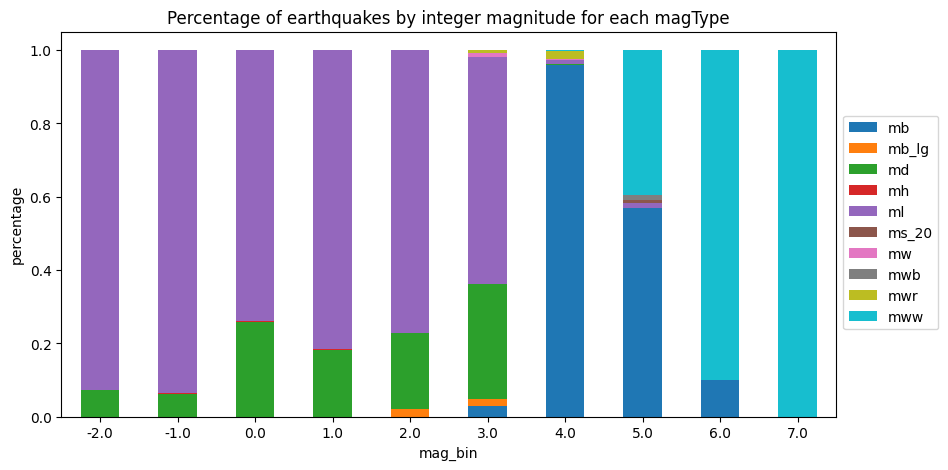

In [ ]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
stacked=True, rot=0, figsize=(10, 5),
title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the axes (discussed in chapter 6)

#pandas.plotting subpackage

##pandas provides some extra plottin functions for a few select plot types.

#About the Data

##In this note, we will be working with Facebooks stock pridce throughout 2018.

#Setup

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col = "date", parse_dates = True
)

#Scatter matrix

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

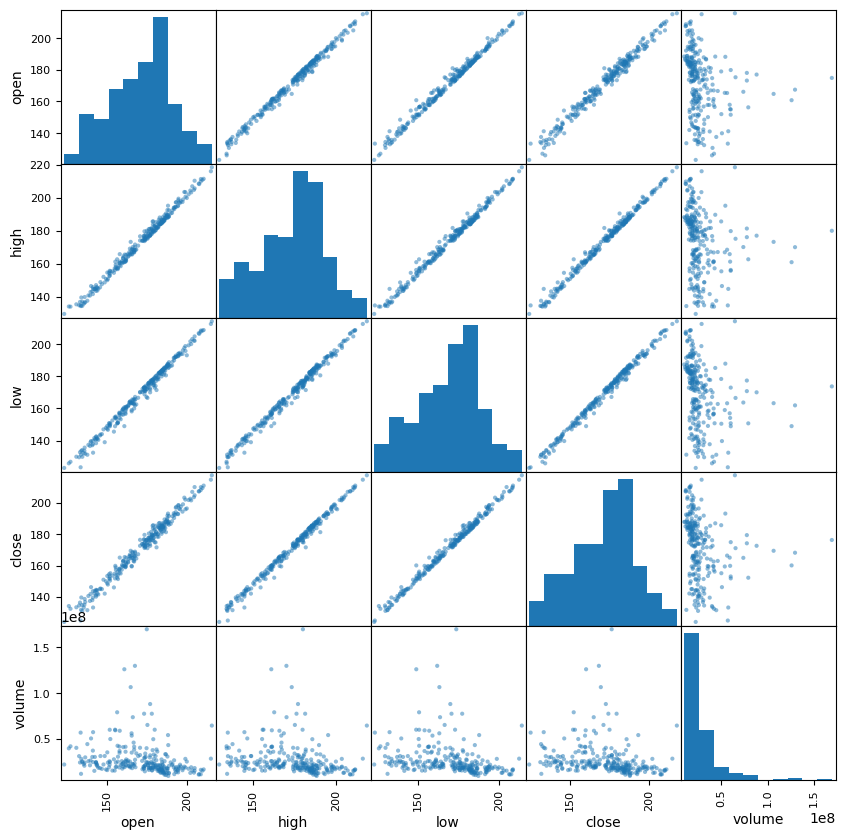

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize = (10, 10))

Changing the diagonal from histograms to KDE

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

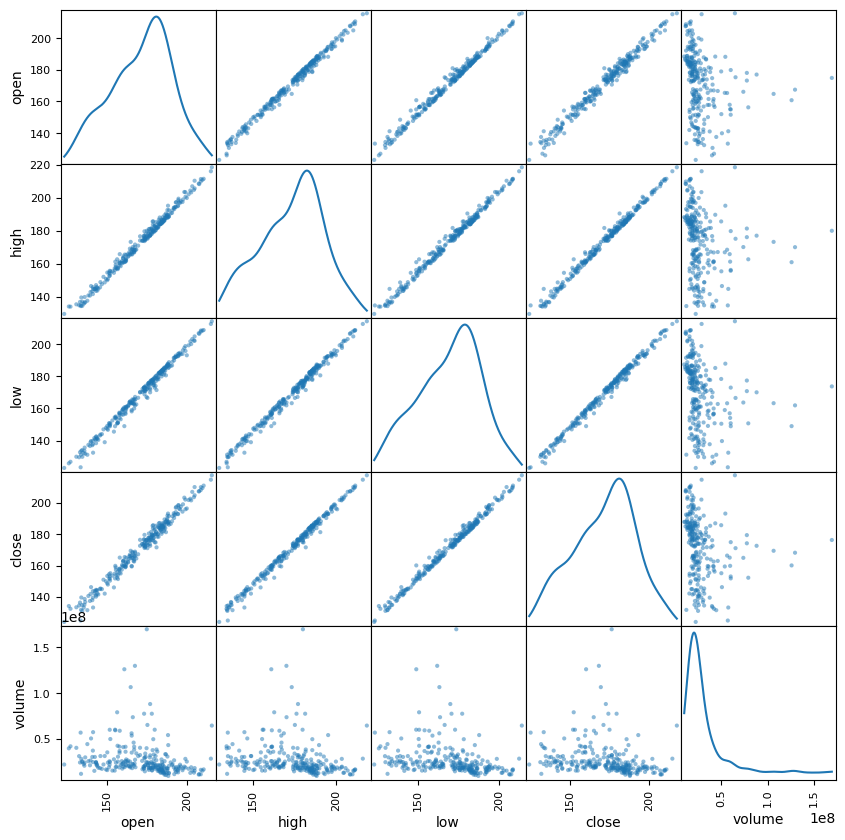

In [ ]:
scatter_matrix(fb, figsize = (10, 10), diagonal = 'kde')

Lag plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

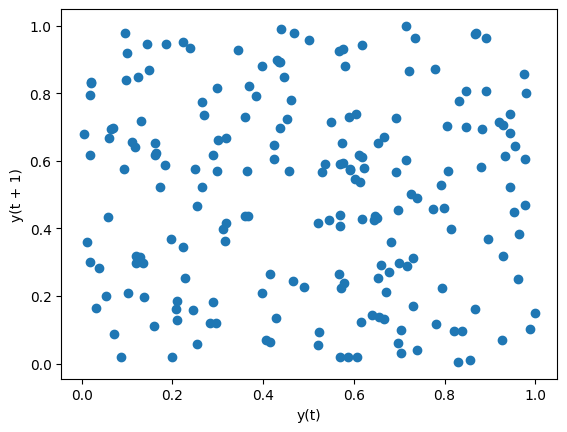

In [ ]:
from pandas.plotting import lag_plot
np.random.seed(0)
lag_plot(pd.Series(np.random.random(size=200)))

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto correlated

In [ ]:
lag_plot(fb.close)

Data Analysis:

    Provide comments on output from the procedures above.

Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

    Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

    Create a histogram and KDE of the change from open to close in the price of Facebook stock.

    Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

    Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
    line.

    Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

        The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

        The second subplot will be a bar plot showing the net effect this had monthly, using resample().

        Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

        Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.


Summary/Conclusion:

    Provide a summary of your learnings and the conclusion for this activity.
